### Import Necessary Libraries

In [1]:
# Import Necessary Libraries
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
import time
import mediapipe as mp
import tensorflow as tf
from scipy import stats

# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

### Initiating Face, Pose & Hand Keypoints Using Mediapipe Holistic

In [2]:
# Initialise holistic model For detecting face, pose and hand tracking
mediapipe_holistic = mp.solutions.holistic

# Utilities for drawing using mediapipe
mediapipe_draw = mp.solutions.drawing_utils

In [3]:
# Function to read image and use holistic model to detect body parts & poses
def mediapipe_detector(model, img):
    # Color Conversion
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img.flags.writeable = False      # Image not writeable
    result = model.process(img)
    img.flags.writeable = True       # Image is writeable
    # Color Reconversion
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img, result

In [4]:
# Style 1 Body Marking - Basic
def draw_bodymarkers(result, img):
    # Draw pose markers
    mediapipe_draw.draw_landmarks(img, result.pose_landmarks, mediapipe_holistic.POSE_CONNECTIONS)
    
    # Draw face markers
    mediapipe_draw.draw_landmarks(img, result.face_landmarks, mediapipe_holistic.FACEMESH_TESSELATION)
    
    # Draw right hand markers
    mediapipe_draw.draw_landmarks(img, result.right_hand_landmarks, mediapipe_holistic.HAND_CONNECTIONS)
    
    # Draw left hand markers
    mediapipe_draw.draw_landmarks(img, result.left_hand_landmarks, mediapipe_holistic.HAND_CONNECTIONS)

In [5]:
# Style 2 Body Mark - Styled
def style_drawmarks(result, img): 
    # Draw pose markers
    mediapipe_draw.draw_landmarks(img, result.pose_landmarks, mediapipe_holistic.POSE_CONNECTIONS,
                             mediapipe_draw.DrawingSpec(color=(0,255,255), thickness=2, circle_radius=4), 
                             mediapipe_draw.DrawingSpec(color=(0,255,255), thickness=2, circle_radius=2)
                             ) 
    
     # Draw face markers
    mediapipe_draw.draw_landmarks(img, result.face_landmarks, mediapipe_holistic.FACEMESH_CONTOURS, 
                             mediapipe_draw.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=2), 
                             mediapipe_draw.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                             )
    
    # Draw right hand markers  
    mediapipe_draw.draw_landmarks(img, result.right_hand_landmarks, mediapipe_holistic.HAND_CONNECTIONS, 
                             mediapipe_draw.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mediapipe_draw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )
    
    # Draw left hand markers
    mediapipe_draw.draw_landmarks(img, result.left_hand_landmarks, mediapipe_holistic.HAND_CONNECTIONS, 
                             mediapipe_draw.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mediapipe_draw.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )  

### Capture Video from Webcam while detecting face, hand and pose motion using mediapipe holistic

In [6]:
# Create a OpenCV VideoCapture Instance
cap = cv2.VideoCapture(0)

# Accessing mediapipe holistic model 
with mediapipe_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Detect Objects using mediapipe
        img, result = mediapipe_detector(holistic,frame)
        print(result)
        
        #Drawing Body Landmarks
        style_drawmarks(result, img)

        # Screen PopUp
        cv2.imshow('WebCam Feed', img)

        # Break Gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

### Observing sample data collected using mediapipe holistic

In [7]:
# Face position data
len(result.face_landmarks.landmark)

468

In [8]:
# Pose data
len(result.pose_landmarks.landmark)

33

In [9]:
# Left hand landmark positions (x,y,z)
print(result.left_hand_landmarks)

None


In [10]:
# Facial Landmarks
print(result.face_landmarks)

landmark {
  x: 0.5024176239967346
  y: 0.5886186361312866
  z: -0.0260243471711874
}
landmark {
  x: 0.5005739331245422
  y: 0.5363863706588745
  z: -0.051824770867824554
}
landmark {
  x: 0.5007203221321106
  y: 0.55132657289505
  z: -0.026241743937134743
}
landmark {
  x: 0.4899396300315857
  y: 0.4965352416038513
  z: -0.04123628884553909
}
landmark {
  x: 0.500179648399353
  y: 0.5236182808876038
  z: -0.055673010647296906
}
landmark {
  x: 0.49938270449638367
  y: 0.5073537826538086
  z: -0.05265052989125252
}
landmark {
  x: 0.49724388122558594
  y: 0.46834051609039307
  z: -0.028842590749263763
}
landmark {
  x: 0.4261056184768677
  y: 0.47012758255004883
  z: 0.006895860191434622
}
landmark {
  x: 0.49618232250213623
  y: 0.43912801146507263
  z: -0.02453138493001461
}
landmark {
  x: 0.495913565158844
  y: 0.42225760221481323
  z: -0.027587180957198143
}
landmark {
  x: 0.49436312913894653
  y: 0.3609798550605774
  z: -0.020507076755166054
}
landmark {
  x: 0.5026644468307495

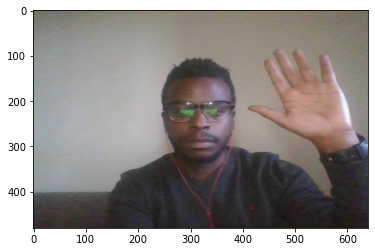

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB), aspect='auto')

In [12]:
style_drawmarks(result, frame)

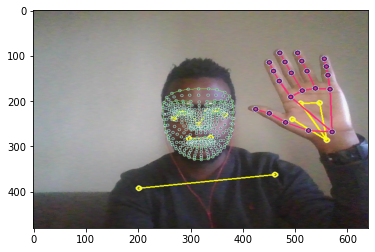

In [13]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB), aspect='auto')

### Extracting the keypoint values into meaningful data

In [14]:
result.pose_landmarks

landmark {
  x: 0.49322882294654846
  y: 0.5282428860664368
  z: -0.7153177261352539
  visibility: 0.9999977946281433
}
landmark {
  x: 0.521634578704834
  y: 0.4633970260620117
  z: -0.6587629914283752
  visibility: 0.9999963641166687
}
landmark {
  x: 0.5368901491165161
  y: 0.46093079447746277
  z: -0.658393383026123
  visibility: 0.9999966621398926
}
landmark {
  x: 0.5504209399223328
  y: 0.45947250723838806
  z: -0.657983124256134
  visibility: 0.9999968409538269
}
landmark {
  x: 0.4677400588989258
  y: 0.471117228269577
  z: -0.6573513746261597
  visibility: 0.9999939203262329
}
landmark {
  x: 0.4509254992008209
  y: 0.47251012921333313
  z: -0.6561123132705688
  visibility: 0.9999910593032837
}
landmark {
  x: 0.43541160225868225
  y: 0.47429051995277405
  z: -0.6561931371688843
  visibility: 0.9999879002571106
}
landmark {
  x: 0.5726966857910156
  y: 0.4799439311027527
  z: -0.3266353905200958
  visibility: 0.9999977350234985
}
landmark {
  x: 0.420337975025177
  y: 0.49696

In [15]:
# Placing different pose features extracted by mediapipe holistic in numpy arrays
# Pose Features Array
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(132)
# Facial Features Array
face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(1404)
# Left & Right Hand features array
left_hand = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
right_hand = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)

In [16]:
pose.shape

(132,)

In [17]:
face.shape

(1404,)

In [18]:
left_hand.shape

(63,)

In [6]:
# Function to extract keypoints from body pose results into numpy arrays
def prep_keypoints(results):
    # Pose Features Array
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(33*4)
    # Facial Features Array
    face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
    # Left & Right Hand features array
    left_hand = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)
    
    # Concatenating all body pose features necessary for sign language recognition
    return np.concatenate([pose,face, left_hand, right_hand])

## Preparing Folders for Data Collection

In [7]:
# Set Folder Path
PATH = os.path.join('Gestures')

# Hand gestures to be detected
# 'hello', 'thankyou', 'apple', 'man', 'woman', 'me', 'you', 'time', 'drink', 'eat', 'house', 'book'
# 'apple', 'thankyou', 'hello', 'woman', 'pipe', 'mirror'
gestures = np.array(['apple','drink', 'hello', 'me', 'mirror', 'pipe', 'thankyou', 'time', 'woman', 'you'])

# Videos to be collected
video_seq = 70

# Setting videoframe rate = 30fps
sequence_length = 30

In [192]:
# Create folder for each gesture sequence
for gesture in gestures:
    # Store all gesture sequences in subfolders 
    for vid in range(video_seq):
        try:
            # Create directory if none exists
            os.makedirs(os.path.join(PATH, gesture, str(vid)))
        except:
            pass

In [11]:
# Sample Data- Extracted keypoints from test video recording
extracted_pts = prep_keypoints(result)[:10]
extracted_pts

array([ 0.45551616,  0.57524776, -1.04927659,  0.99988419,  0.479249  ,
        0.50659162, -0.96014434,  0.99967951,  0.49633369,  0.50395173])

In [23]:
# Saving extracted keypoints' numpy array
np.save('0', extracted_pts)

In [24]:
# Test loading saved numpy array
np.load('0.npy')

array([ 0.49322882,  0.52824289, -0.71531773,  0.99999779,  0.52163458,
        0.46339703, -0.65876299,  0.99999636,  0.53689015,  0.46093079])

## Collecting Sequence of Keypoints to train the LSTM Model

In [122]:
# Create a OpenCV VideoCapture Instance
cap = cv2.VideoCapture(0)

# Accessing mediapipe holistic model 
with mediapipe_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
        # Loop through the gestures
        for gesture in gestures:
            # Looping through the videos
            for vid in range(video_seq):
                # Looping through each frame of each video
                for frame_no in range(sequence_length):
    
                    # Read feed
                    ret, frame = cap.read()

                    # Detect Objects using mediapipe
                    img, result = mediapipe_detector(holistic,frame)
                    print(result)
                    
                    #Drawing Body Landmarks
                    style_drawmarks(result, img)

                    # Data collection logic
                    # if collecting 1st frame
                    if frame_no == 0:
                        # Print text
                        cv2.putText(img, 'DATA COLLECTION STARTING...', (120,200),
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(img, f'Collecting frames for {gesture} Video No: {vid}', (15,12),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        
                        # Screen PopUp
                        cv2.imshow('Computer Vision Feed', img)
                        # Wait 2.5 seconds between video recordings
                        cv2.waitKey(2500)
        
                    else:
                        cv2.putText(img, f'Collecting frames for {gesture} Video No: {vid}', (15,12),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Screen PopUp
                        cv2.imshow('Computer Vision Feed', img)
                        
                    # After data collection, extract gesture keypoints to numpy array & save
                    gesture_keypoints = prep_keypoints(result)
                    npy_path = os.path.join(PATH, gesture, str(vid), str(frame_no))
                    np.save(npy_path, gesture_keypoints)                    


                    # Break Gracefully 
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                        
        cap.release()
        cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows

### Preprocessing Data & Creating Labels& Features

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
labels = {label:i for i, label in enumerate(gestures)}
print(labels)

{'apple': 0, 'drink': 1, 'hello': 2, 'me': 3, 'mirror': 4, 'pipe': 5, 'thankyou': 6, 'time': 7, 'woman': 8, 'you': 9}


In [11]:
labels_list = list()
seq_arr = list()

# Looping through gestures
for gesture in gestures:
    for seq in np.array(os.listdir(os.path.join(PATH, gesture))).astype(int):
        window = list()
        for frame_no in range(sequence_length):
            ans = np.load(os.path.join(PATH, gesture, str(seq), f"{frame_no}.npy"))
            window.append(ans)
        seq_arr.append(window)
        labels_list.append(labels[gesture])

In [12]:
np.array(seq_arr).shape

(700, 30, 1662)

In [13]:
np.array(labels_list).shape

(700,)

### Spliting Data into Training & Test(Evaluation) Sets

In [14]:
# Training Set, x
x = np.array(seq_arr)

In [15]:
x.shape

(700, 30, 1662)

In [16]:
y = to_categorical(labels_list).astype(int)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
y_test.shape

(140, 10)

### Build & Train an LSTM Model to classify hand motion to sign language keywords

In [19]:
log_dir = os.path.join('Logs')
tensorboard_callback = TensorBoard(log_dir=log_dir)

In [132]:
sign_lang_model = Sequential()
sign_lang_model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
sign_lang_model.add(LSTM(128, return_sequences=False, activation='relu'))
sign_lang_model.add(Dense(64, activation='relu'))
sign_lang_model.add(Dense(32, activation='relu'))
sign_lang_model.add(Dense(gestures.shape[0], activation='softmax'))

In [133]:
sign_lang_model.compile(optimizer="Adam", 
                        loss = "categorical_crossentropy", 
                        metrics=["categorical_accuracy"])

In [134]:
sign_lang_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_44 (LSTM)              (None, 128)               98816     
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 10)                330       
                                                                 
Total params: 551,594
Trainable params: 551,594
Non-trainable params: 0
_________________________________________________________________


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
training_history = sign_lang_model.fit(x_train, y_train, 
                                       epochs=100, 
                                       batch_size=32, 
                                       callbacks = [tensorboard_callback], 
                                       validation_data = (x_test, y_test))

Epoch 1/100
18/18 [==============================] - 4s 101ms/step - loss: 2.4527 - categorical_accuracy: 0.1893 - val_loss: 2.2607 - val_categorical_accuracy: 0.1429
Epoch 2/100
18/18 [==============================] - 1s 79ms/step - loss: 2.0377 - categorical_accuracy: 0.2429 - val_loss: 5.8856 - val_categorical_accuracy: 0.1143
Epoch 3/100
18/18 [==============================] - 1s 80ms/step - loss: 5.8942 - categorical_accuracy: 0.2214 - val_loss: 3.3766 - val_categorical_accuracy: 0.1714
Epoch 4/100
18/18 [==============================] - 1s 82ms/step - loss: 2.7116 - categorical_accuracy: 0.1857 - val_loss: 2.0885 - val_categorical_accuracy: 0.3143
Epoch 5/100
18/18 [==============================] - 1s 81ms/step - loss: 1.9343 - categorical_accuracy: 0.3071 - val_loss: 1.9192 - val_categorical_accuracy: 0.2714
Epoch 6/100
18/18 [==============================] - 1s 84ms/step - loss: 1.7088 - categorical_accuracy: 0.4250 - val_loss: 1.7098 - val_categorical_accuracy: 0.4429
Epo

18/18 [==============================] - 2s 85ms/step - loss: 0.1245 - categorical_accuracy: 0.9607 - val_loss: 0.7395 - val_categorical_accuracy: 0.6857
Epoch 51/100
18/18 [==============================] - 2s 86ms/step - loss: 1.3769 - categorical_accuracy: 0.6196 - val_loss: 0.8474 - val_categorical_accuracy: 0.7214
Epoch 52/100
18/18 [==============================] - 2s 88ms/step - loss: 0.8633 - categorical_accuracy: 0.7036 - val_loss: 0.7172 - val_categorical_accuracy: 0.7714
Epoch 53/100
18/18 [==============================] - 2s 85ms/step - loss: 0.4885 - categorical_accuracy: 0.8804 - val_loss: 0.4110 - val_categorical_accuracy: 0.8929
Epoch 54/100
18/18 [==============================] - 2s 112ms/step - loss: 0.2822 - categorical_accuracy: 0.9464 - val_loss: 0.2843 - val_categorical_accuracy: 0.9214
Epoch 55/100
18/18 [==============================] - 2s 116ms/step - loss: 0.1725 - categorical_accuracy: 0.9625 - val_loss: 0.1791 - val_categorical_accuracy: 0.9571
Epoch 56/

18/18 [==============================] - 2s 92ms/step - loss: 0.0855 - categorical_accuracy: 0.9679 - val_loss: 0.0595 - val_categorical_accuracy: 0.9929
Epoch 100/100
18/18 [==============================] - 2s 96ms/step - loss: 0.3604 - categorical_accuracy: 0.9054 - val_loss: 0.1622 - val_categorical_accuracy: 0.9500


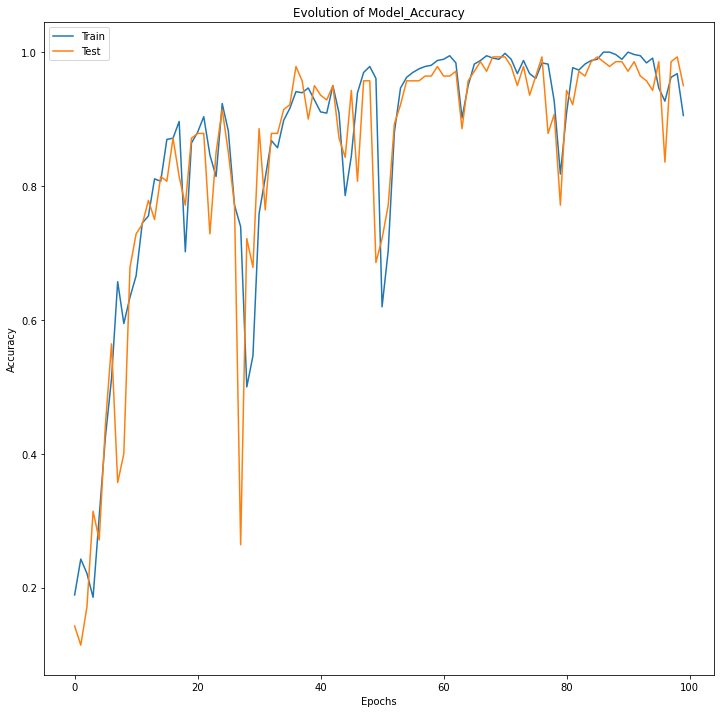

In [138]:
# Showing the Accuracy history of the KSL recognition model as it trained
plt.figure(figsize=(12,12))
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.title('Evolution of Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

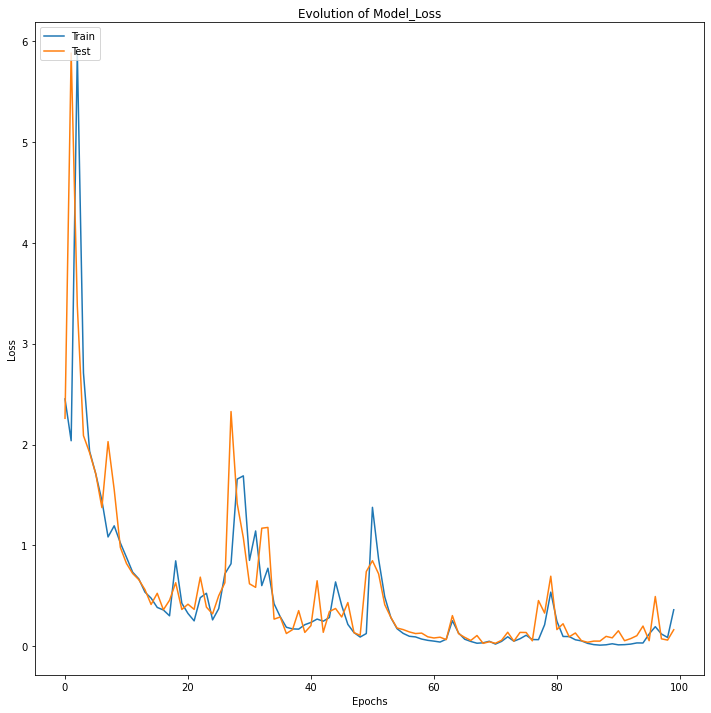

In [139]:
# Showing the Accuracy history of the KSL recognition model as it trained
plt.figure(figsize=(12,12))
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Evolution of Model_Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Making Predictions

In [140]:
res = sign_lang_model.predict(x_test)

In [141]:
# Prediction 1
gestures[np.argmax(res[1])]

'thankyou'

In [142]:
# Prediction 1 Real Answer
gestures[np.argmax(y_test[1])]

'thankyou'

In [143]:
# Prediction 2
gestures[np.argmax(res[2])]

'you'

In [144]:
# Prediction 2 Real Answer
gestures[np.argmax(y_test[2])]

'you'

In [145]:
# Prediction 3
gestures[np.argmax(res[6])]

'pipe'

In [146]:
# Prediction 3 Real Answer
gestures[np.argmax(y_test[6])]

'pipe'

In [147]:
# Prediction 4
gestures[np.argmax(res[7])]

'woman'

In [148]:
# Prediction 4 Real Answer
gestures[np.argmax(y_test[7])]

'woman'

In [149]:
# Prediction 5
gestures[np.argmax(res[9])]

'woman'

In [150]:
# Prediction 5 Real Answer
gestures[np.argmax(y_test[9])]

'woman'

### Saving The LSTM Model

In [151]:
# Save Model
sign_lang_model.save('sign_lang_model.h5')

In [152]:
sign_lang_model.load_weights('sign_lang_model.h5')

In [153]:
# Load Model
sign_lang_model = tf.keras.models.load_model('sign_lang_model.h5')

In [154]:
sign_lang_model.load_weights('sign_lang_model.h5')

### Evaluating the Model

In [31]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [156]:
y_predicted = sign_lang_model.predict(x_test)

In [157]:
y_real_ans = np.argmax(y_test, axis=1).tolist()
y_predicted = np.argmax(y_predicted, axis=1).tolist()

In [158]:
multilabel_confusion_matrix(y_real_ans, y_predicted)

array([[[119,   0],
        [  0,  21]],

       [[134,   0],
        [  0,   6]],

       [[126,   0],
        [  1,  13]],

       [[128,   0],
        [  2,  10]],

       [[121,   6],
        [  0,  13]],

       [[128,   0],
        [  0,  12]],

       [[127,   0],
        [  1,  12]],

       [[128,   0],
        [  0,  12]],

       [[118,   0],
        [  3,  19]],

       [[124,   1],
        [  0,  15]]])

In [159]:
# Evaluating the Model's Accuracy
accuracy_score(y_real_ans, y_predicted)

0.95

### Real Time Testing

In [13]:
colours = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245), (245,117,16)]

In [14]:
def visualiser(res, gestures, ip_frame, colours):
    op_frame = ip_frame.copy()
    for i, j in enumerate(res):
        cv2.rectangle(op_frame, (0,60+i*40), (int(j*100), 90+i*40), colours[i], -1)
        cv2.putText(op_frame, gestures[i], (0, 85+i*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return op_frame

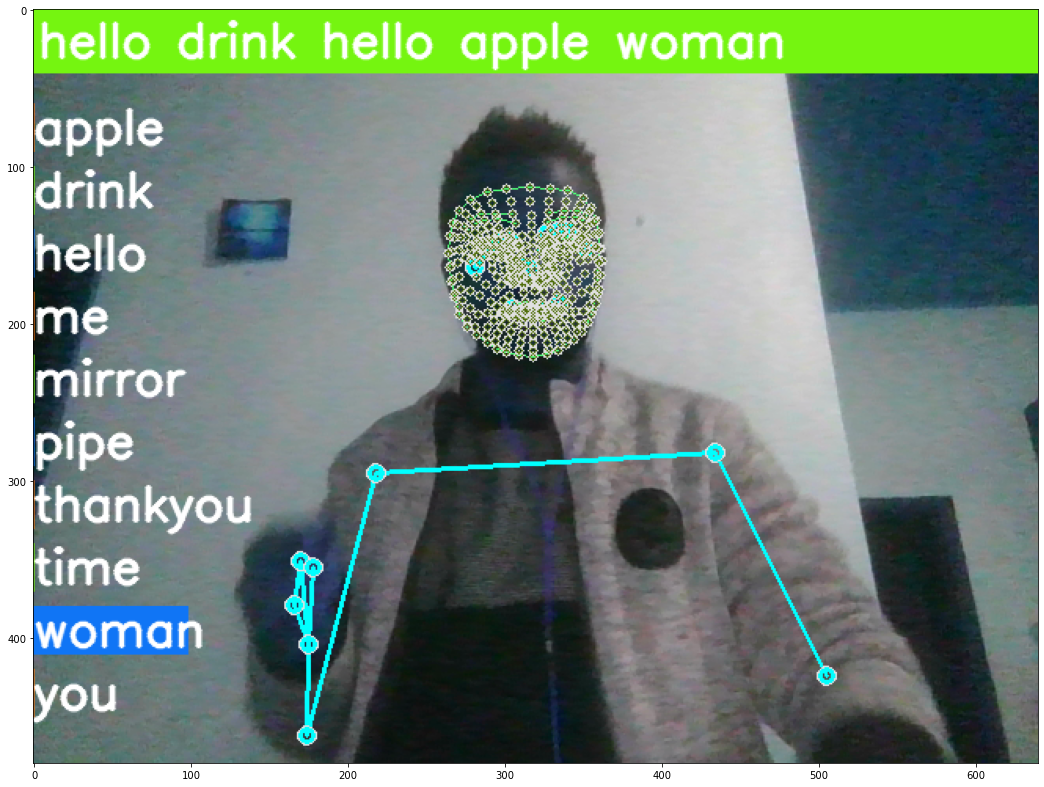

In [89]:
plt.figure(figsize=(18,18))
plt.imshow(visualiser(res, gestures, img, colours))

In [88]:
# Logic to run Webcam for real time tests
sentence = list()
video_sequence = list()
min_threshold = 0.8
predictions = list()
 
# Create a OpenCV VideoCapture Instance
vid_capture = cv2.VideoCapture(0)

# Accessing mediapipe holistic model 
with mediapipe_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while vid_capture.isOpened():
        # Read feed
        ret, frame = vid_capture.read()

        # Detect Realtime Objects using mediapipe
        img, result = mediapipe_detector(holistic,frame)
        print(result)
        
        #Drawing Body Landmarks
        style_drawmarks(result, img)
        
        # Making Predictions
        # Preping datapoints from real time sequence
        data_points = prep_keypoints(result)
        # Add datapoint to vid_sequence list
        video_sequence.append(data_points)
#         video_sequence.insert(0, data_points)
        # Select last 30 frames from video sequence
        video_sequence = video_sequence[-30:]
        
        # From last 30 video frames...
        if len(video_sequence) == 30:
            # Make Predictions
            res = sign_lang_model.predict(np.expand_dims(video_sequence, axis=0))[0]
            # Print predicted result
            print(gestures[np.argmax(res)])
            predictions.append(np.argmax(res))
            
         #3. Visualise logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > min_threshold: 
                    
                    if len(sentence) > 0: 
                        if gestures[np.argmax(res)] != sentence[-1]:
                            sentence.append(gestures[np.argmax(res)])
                    else:
                        sentence.append(gestures[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            # Viz probabilities
            img = visualiser(res, gestures, img, colours)
            
        cv2.rectangle(img, (0,0), (640, 40), (117,245,16), -1)
        cv2.putText(img, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Screen PopUp
        cv2.imshow('WebCam Feed', img)

        # Break Gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    vid_capture.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
mirror
<class 'mediapipe.python.solution_base.SolutionOutputs'>
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediap

<class 'mediapipe.python.solution_base.SolutionOutputs'>
mirror
<class 'mediapipe.python.solution_base.SolutionOutputs'>
mirror
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutput

<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apple
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
drink
<class 'mediapipe.python.solution_base.SolutionOutputs'>
me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
time
<class 'mediapipe.python.solution_base.SolutionOutputs'>
drink
<class 'mediapipe.python.solution_base.SolutionOutputs'>
drink
<class 'mediapipe.python.solution_base.SolutionOutputs'>
me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
mirror
<class 'mediapipe.python.solution_base.SolutionOutputs'>
mirror
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOutputs'>
woman
<class 'mediapipe.python.solution_base.SolutionOu

### HyperParameter Tuning

In [23]:
import keras_tuner as kt
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [24]:
# Create the model using Keras Tuner
def ksl_model_tuner(hyperparameter):
    optimal_ksl_model = tf.keras.Sequential()
    optimal_ksl_model.add(LSTM(hyperparameter.Int('layer_1',min_value=32,max_value=128,step=32), return_sequences=True, activation='relu', input_shape=(30,1662)))
    optimal_ksl_model.add(LSTM(hyperparameter.Int('layer_2',min_value=64,max_value=512,step=32), return_sequences=False, activation='relu'))
    optimal_ksl_model.add(Dense(hyperparameter.Int('dense_layer_1', min_value=32, max_value=512), activation='relu'))
    optimal_ksl_model.add(Dense(hyperparameter.Int('dense_layer_2', min_value=32, max_value=128), activation='relu'))
    optimal_ksl_model.add(Dense(gestures.shape[0], activation='softmax'))
    
    optimal_ksl_model.compile(optimizer=tf.keras.optimizers.Adam(hyperparameter.Choice('learning_rate', values=[1e-2,1e-3])), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    return optimal_ksl_model

In [176]:
find_optimal = RandomSearch(ksl_model_tuner, 
                            objective='val_categorical_accuracy', 
                            max_trials=7, directory='output', 
                            project_name='ksl_recognition')

INFO:tensorflow:Reloading Oracle from existing project output/ksl_recognition/oracle.json


INFO:tensorflow:Reloading Oracle from existing project output/ksl_recognition/oracle.json


In [177]:
# Search for the best Parameter from the Model
find_optimal.search(x_train, y_train, 
                    epochs=100, 
                    validation_data = (x_test, y_test))

Trial 8 Complete [00h 05m 53s]
val_categorical_accuracy: 0.1071428582072258

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 27m 54s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [193]:
# Obtaining optimised values for the asl model
optimal_ksl_model = find_optimal.get_best_models(num_models=2)[0]

In [198]:
optimal_ksl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 51)                3315      
                                                                 
 dense_1 (Dense)             (None, 40)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
Total params: 480,941
Trainable params: 480,941
Non-trainable params: 0
_________________________________________________________________


In [30]:
keras_callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=12, verbose=1, restore_best_weights=True),
    ModelCheckpoint('checkpoint', monitor='val_loss', save_best_only=True, mode='min')
]

In [34]:
opt_training_history = optimal_ksl_model.fit(x_train, y_train, epochs=100, callbacks = [tensorboard_callback, keras_callbacks], validation_data = (x_test, y_test))

Epoch 1/100
18/18 [==============================] - 1s 68ms/step - loss: 2.6195e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0184 - val_categorical_accuracy: 0.9857
Epoch 2/100
18/18 [==============================] - 1s 64ms/step - loss: 2.5112e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0176 - val_categorical_accuracy: 0.9857
Epoch 3/100
18/18 [==============================] - 1s 65ms/step - loss: 2.4369e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0200 - val_categorical_accuracy: 0.9857
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 2.4958e-04 - categorical_accuracy: 1.0000INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


18/18 [==============================] - 4s 260ms/step - loss: 2.4958e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0162 - val_categorical_accuracy: 0.9857
Epoch 5/100
18/18 [==============================] - 1s 65ms/step - loss: 2.1699e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0212 - val_categorical_accuracy: 0.9857
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 2.1234e-04 - categorical_accuracy: 1.0000INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


18/18 [==============================] - 4s 203ms/step - loss: 2.1234e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0161 - val_categorical_accuracy: 0.9857
Epoch 7/100
18/18 [==============================] - 1s 70ms/step - loss: 2.0202e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0184 - val_categorical_accuracy: 0.9857
Epoch 8/100
18/18 [==============================] - 1s 69ms/step - loss: 1.8721e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0189 - val_categorical_accuracy: 0.9857
Epoch 9/100
18/18 [==============================] - 1s 65ms/step - loss: 1.8090e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0199 - val_categorical_accuracy: 0.9857
Epoch 10/100
18/18 [==============================] - 1s 65ms/step - loss: 1.7518e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0179 - val_categorical_accuracy: 0.9857
Epoch 11/100
18/18 [==============================] - 1s 65ms/step - loss: 1.6606e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0198 - val_categorical_accura

In [35]:
# Save Model
optimal_ksl_model.save('optimised_model.h5')

In [25]:
# Load Model
optimal_ksl_model = tf.keras.models.load_model('optimised_model.h5')
optimal_ksl_model.load_weights('optimised_model.h5')

In [9]:
# Load Model
optimal_ksl_model = tf.keras.models.load_model('optimised_model.h5')

In [10]:
optimal_ksl_model.load_weights('optimised_model.h5')

In [23]:
prediction = optimal_ksl_model.predict(x_test)

In [24]:
# Prediction 1
gestures[np.argmax(prediction[1])]

'thankyou'

In [25]:
# Prediction 1
gestures[np.argmax(y_test[1])]

'thankyou'

In [26]:
# Prediction 2
gestures[np.argmax(prediction[7])]

'woman'

In [27]:
# Prediction 2
gestures[np.argmax(y_test[7])]

'woman'

In [28]:
y_predict = optimal_ksl_model.predict(x_test)

In [29]:
y_true = np.argmax(y_test, axis=1).tolist()
y_predict = np.argmax(y_predict, axis=1).tolist()

In [32]:
multilabel_confusion_matrix(y_true, y_predict)

array([[[123,   0],
        [  0,  17]],

       [[127,   0],
        [  0,  13]],

       [[125,   0],
        [  0,  15]],

       [[124,   0],
        [  0,  16]],

       [[125,   0],
        [  0,  15]],

       [[128,   0],
        [  0,  12]],

       [[125,   0],
        [  0,  15]],

       [[130,   0],
        [  0,  10]],

       [[125,   0],
        [  0,  15]],

       [[128,   0],
        [  0,  12]]])

In [33]:
# Evaluating the Model's Accuracy
accuracy_score(y_true, y_predict)

1.0

In [25]:
# Logic to run Webcam for real time tests
sentence = list()
video_sequence = list()
min_threshold = 0.8
predictions = list()
 
# Create a OpenCV VideoCapture Instance
vid_capture = cv2.VideoCapture(0)

# Accessing mediapipe holistic model 
with mediapipe_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while vid_capture.isOpened():
        # Read feed
        ret, frame = vid_capture.read()

        # Detect Realtime Objects using mediapipe
        img, result = mediapipe_detector(holistic,frame)
        print(result)
        
        #Drawing Body Landmarks
        style_drawmarks(result, img)
        
        # Making Predictions
        # Preping datapoints from real time sequence
        data_points = prep_keypoints(result)
        # Add datapoint to vid_sequence list
        video_sequence.append(data_points)
        # Video_sequence.insert(0, data_points)
        # Select last 30 frames from video sequence
        video_sequence = video_sequence[-30:]
        
        # From last 30 video frames...
        if len(video_sequence) == 30:
            # Make Predictions
            res = optimal_ksl_model.predict(np.expand_dims(video_sequence, axis=0))[0]
            # Print predicted result
            print(gestures[np.argmax(res)])
            predictions.append(np.argmax(res))
            
         #3. Visualise logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > min_threshold: 
                    
                    if len(sentence) > 0: 
                        if gestures[np.argmax(res)] != sentence[-1]:
                            sentence.append(gestures[np.argmax(res)])
                    else:
                        sentence.append(gestures[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            # Viz probabilities
            img = visualiser(res, gestures, img, colours)
            
        cv2.rectangle(img, (0,0), (640, 40), (117,245,16), -1)
        cv2.putText(img, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Screen PopUp
        cv2.imshow('WebCam Feed', img)

        # Break Gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    vid_capture.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

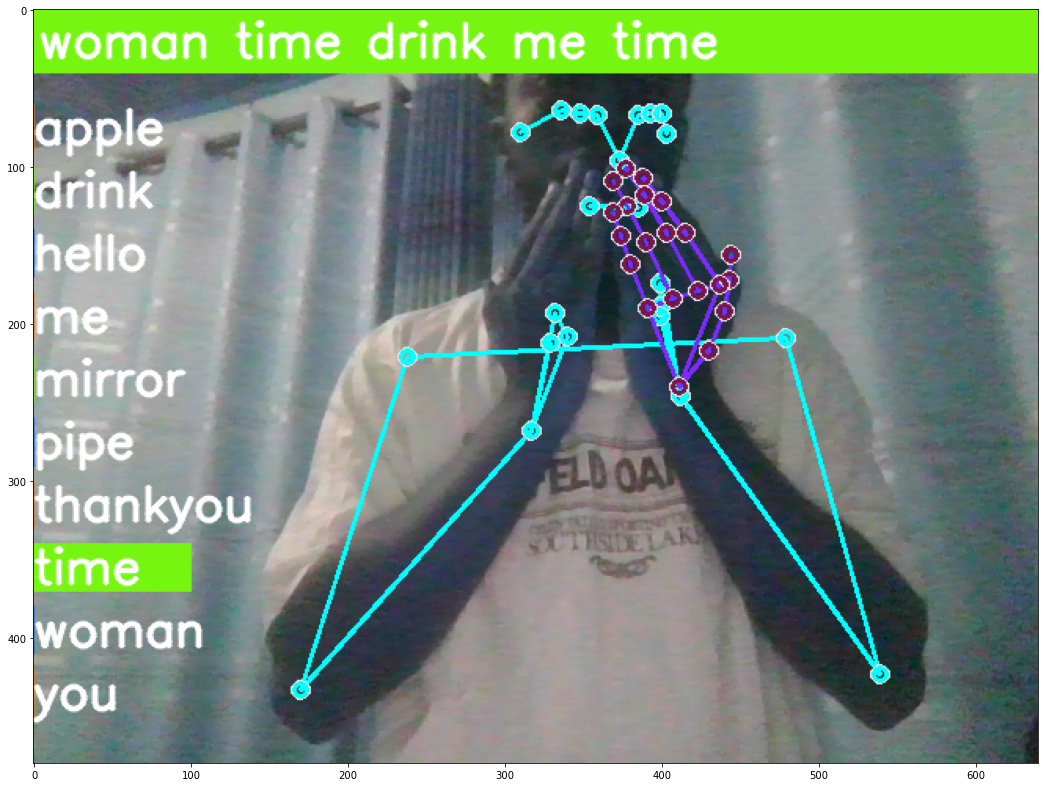

In [18]:
plt.figure(figsize=(18,18))
plt.imshow(visualiser(res, gestures, img, colours))